In [1]:
#Hierarchical Clustering: single linkage
#Initialize libraries
import numpy as np 
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from scipy.spatial import distance
import math
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) 

In [2]:
points_2 = pd.read_csv("C:/Users/ManasiAdmin/Desktop/College stuff/Semester-6/Information Retreival Semester-6/Agglomeratic_clustering/dataset/points_2.csv", names=['x0', 'x1'])

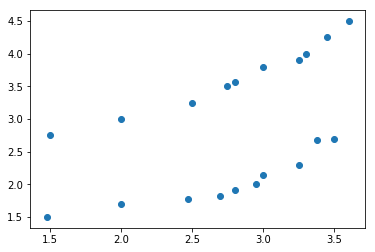

In [3]:
plt.scatter(points_2['x0'],points_2['x1'])

In [14]:
def singlelink_distance(clusters ,cluster_num):
   
    while len(clusters) is not cluster_num:
        # Clustering           
        closest_distance=clust_1=clust_2 = math.inf
        # Going through every cluster
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            # Iterating through every point in the cluster
            for point_id,point in enumerate(cluster): 
                # Compare with cluster following the present one
                for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                    # Pass through every point in potential cluster
                    for point2_id, point2 in enumerate(cluster2):
# Distance is better than previous best than overwrite
                        if distance.euclidean(point,point2) < closest_distance: 
                            closest_distance = distance.euclidean(point,point2)
                            clust_1 = cluster_id

                            clust_2 = cluster2_id+cluster_id+1
              
        
        clusters[clust_1].extend(clusters[clust_2]) 
        # Once again we have clustered, dont require index
        clusters.pop(clust_2) 
    return(clusters)

In [15]:
### Hierarchical clustering for single linkage definition
def single_agglomeratic(data, cluster_num, metric = 'single'):
    # initialize every point as cluster
    init_clusters=[]
    for index, row in data.iterrows():
        init_clusters.append([[row['x0'], row['x1']]])
    if metric is 'single':
        return singlelink_distance(init_clusters, cluster_num)

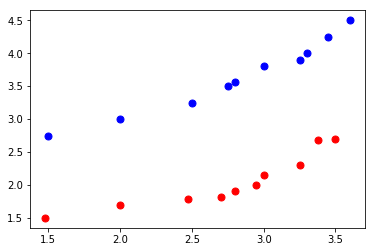

In [23]:
clusters = single_agglomeratic(points_2,2)
colors = ['blue', 'red']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=7, color=colors[cluster_index])